# Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# allow plots to appear within the notebook
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/cleaned_sentiment_scores.csv')
df.head()

,Unnamed: 0,time,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,price_difference
0,0,2018-12-31,0.138213,0.791725,0.070078,0.133069,3625.00,3835.40,3829.00,3691.86,12799.942626,NaN
1,1,2019-01-01,0.133899,0.801962,0.064177,0.131864,3651.02,3841.17,3691.87,3826.10,10812.884988,1.0
2,2,2019-01-02,0.124542,0.805365,0.070119,0.111221,3770.07,3916.57,3826.10,3890.79,9982.470846,1.0
3,3,2019-01-03,0.145012,0.785654,0.069367,0.141588,3758.07,3893.80,3890.80,3787.57,9327.647089,0.0
4,4,2019-01-04,0.124144,0.801732,0.074139,0.123028,3730.00,3849.00,3787.57,3820.82,9225.150500,1.0


In [3]:
# Drop Unnamed column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Drop all rows with null values
df = df.dropna()

In [5]:
# Convert price_difference column to integer
df['price_difference'] = df['price_difference'].astype(int)

In [6]:
df.dtypes

time                 object
avg_positive        float64
avg_neutral         float64
avg_negative        float64
avg_compound        float64
low                 float64
high                float64
open                float64
close               float64
volume              float64
price_difference      int32
dtype: object

In [7]:
df.describe()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,price_difference
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.127937,0.803008,0.069057,0.127237,16918.036684,18070.012448,17535.253096,17573.644676,15968.968337,0.540795
std,0.007205,0.007798,0.005417,0.022316,15270.944504,16455.308586,15930.540944,15946.774225,12867.252150,0.498594
min,0.105348,0.761980,0.052819,0.017491,3337.870000,3383.140000,3358.990000,3359.000000,2699.830014,0.000000
25%,0.123239,0.797984,0.065355,0.113462,7570.232500,8088.010000,7850.562500,7874.167500,8022.604002,0.000000
50%,0.127816,0.803003,0.068791,0.128613,9611.195000,10181.950000,9887.605000,9899.840000,12374.627420,1.000000
75%,0.132358,0.808023,0.072579,0.142913,22628.222500,24097.187500,23288.762500,23536.872500,19190.032921,1.000000
max,0.177963,0.835052,0.089819,0.188500,62036.730000,64899.000000,63588.220000,63588.220000,130316.646844,1.000000


## Train, Test, Split

In [8]:
X = df[['avg_positive', 'avg_neutral', 'avg_negative', 'avg_compound']]
y = df[['price_difference']]

In [9]:
# Create train, test, split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standard Scaler

In [10]:
# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Logistic Regression

In [11]:
# Create instance of classifier
LogReg = LogisticRegression()

LogReg.fit(X_train, y_train.values.ravel())

y_pred = LogReg.predict(X_test)

In [12]:
acc_score = round(accuracy_score(y_test, y_pred)*100, 2)

print("Accuracy Score: ", acc_score)

Accuracy Score:  52.61


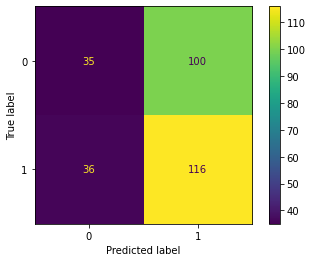

In [13]:
# plot confusion matrix
plot_confusion_matrix(LogReg, X_test, y_test)

## K Nearest Neighbors

### Find Best Value of K

In [14]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.5435540069686411, 0.519163763066202, 0.5226480836236934, 0.5400696864111498, 0.5609756097560976, 0.5679442508710801, 0.5574912891986062, 0.5435540069686411, 0.5400696864111498, 0.5226480836236934, 0.5331010452961672, 0.5296167247386759, 0.519163763066202, 0.5226480836236934, 0.5226480836236934, 0.5121951219512195, 0.5331010452961672, 0.5087108013937283, 0.5121951219512195, 0.519163763066202, 0.5331010452961672, 0.5226480836236934, 0.5226480836236934, 0.519163763066202, 0.5435540069686411]


Text(0, 0.5, 'Testing Accuracy')

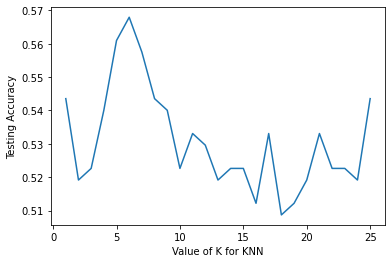

In [15]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [16]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5435540069686411


C:\Users\User1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Support Vector Machine (SVM)

In [17]:
# Create object SVR
svr = SVR(kernel = 'linear',C = 1000)

In [18]:
svr.fit(X_train,y_train)
y_test_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)

C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [19]:
y_test_pred

array([ 0.38014143,  0.61029398,  0.72293395,  0.96307981,  0.96017859,
        0.59515886,  0.45458646,  0.60270214,  0.62884487,  0.72666638,
        0.70670478,  0.87428965,  0.75692756,  1.04180595,  0.73804715,
        0.76454947,  0.68788998,  0.7655657 ,  0.72835876,  0.75750389,
        1.12594715,  0.80746159,  0.99090125,  1.32308183,  0.79615247,
        0.7311605 ,  0.86034591,  0.45317933,  0.80604813,  0.4628712 ,
        0.74431103,  0.57236055,  0.50645627,  0.37703693,  0.26858021,
        0.72318244,  0.83185481,  0.29485719,  0.74787943,  0.81805261,
        0.87616161,  0.86311779,  0.7198567 ,  1.01476646,  0.98479863,
        0.79494894,  0.93371078,  0.301702  ,  0.71158591,  0.3649731 ,
        0.65059146,  0.66043625,  0.0890554 ,  0.97089562,  0.84455128,
        0.87869255,  0.94622517,  0.60043135,  0.56346673,  0.81590216,
       -0.02024323,  0.96530499,  0.89366836,  0.82855691,  0.87688557,
        1.11377937,  0.52122374,  0.60008857,  0.66856092,  0.78

In [20]:
# Check Performance
r2_score(y_train,y_train_pred)

-0.09053498579135999

C:\Users\User1\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User1\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


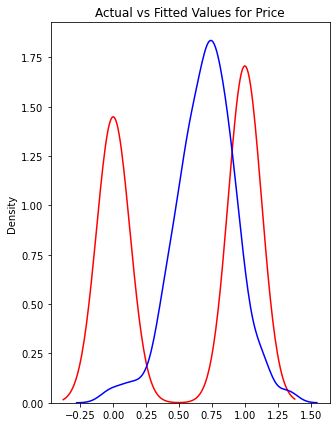

In [21]:
# plot actual vs fitted values
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()

In [22]:

svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_test,y_test)

y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
y_test_pred

C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [23]:
confusion_matrix(y_test,y_test_pred)

array([[  0, 135],
       [  0, 152]], dtype=int64)

In [24]:
accuracy_score(y_test,y_test_pred)

0.5296167247386759

### We have an accuracy score of 52.6%

## Random Forest

In [25]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

<ipython-input-25-e1c1a29b2567>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


ACCURACY OF THE MODEL:  0.5609756097560976


## Gradient Boosting

In [26]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.608
Accuracy score (validation): 0.502
Learning rate:  0.1
Accuracy score (training): 0.608
Accuracy score (validation): 0.512
Learning rate:  0.25
Accuracy score (training): 0.640
Accuracy score (validation): 0.544
Learning rate:  0.5
Accuracy score (training): 0.691
Accuracy score (validation): 0.554
Learning rate:  0.75


C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Accuracy score (training): 0.723
Accuracy score (validation): 0.544
Learning rate:  1
Accuracy score (training): 0.712
Accuracy score (validation): 0.509
